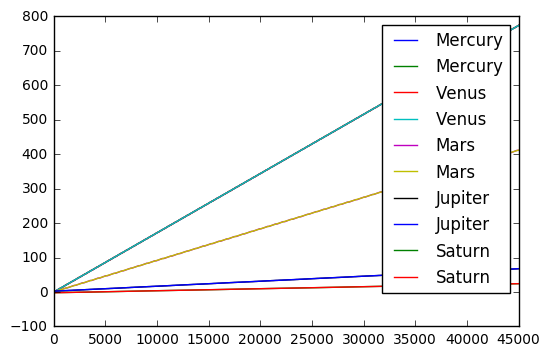

拟合参数: [   365.24291655    365.24342778    686.90750392   4330.34197709
  10726.12818189]


In [82]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np

Mars = ascii.read('c:/users/a/desktop/planet/Mars.txt')
Mercury = ascii.read('c:/users/a/desktop/planet/Mercury.txt')
Venus = ascii.read('c:/users/a/desktop/planet/Venus.txt')
Jupiter = ascii.read('c:/users/a/desktop/planet/Jupiter.txt')             
Saturn = ascii.read('c:/users/a/desktop/planet/Saturn.txt')

Func_Me = np.polyfit(Mercury['col1'],Mercury['col2'],1)
Func_Ve = np.polyfit(Venus['col1'],Venus['col2'],1)
Func_Ma = np.polyfit(Mars['col1'],Mars['col2'],1)
Func_Ju = np.polyfit(Jupiter['col1'],Jupiter['col2'],1)
Func_Sa = np.polyfit(Saturn['col1'],Saturn['col2'],1)
f_Me  = np.poly1d(Func_Me)
f_Ve  = np.poly1d(Func_Ve)
f_Ma  = np.poly1d(Func_Ma)
f_Ju  = np.poly1d(Func_Ju)
f_Sa  = np.poly1d(Func_Sa)

longitudes_Me = f_Me(Mercury['col1'])
longitudes_Ve = f_Ve(Venus['col1'])
longitudes_Ma = f_Ma(Mars['col1'])
longitudes_Ju = f_Ju(Jupiter['col1'])
longitudes_Sa = f_Sa(Saturn['col1'])

plt.plot(Mercury['col1'],Mercury['col2'],Mercury['col1'],longitudes_Me,label='Mercury')
plt.plot(Venus['col1'],Venus['col2'],Venus['col1'],longitudes_Ve,label='Venus')
plt.plot(Mars['col1'],Mars['col2'],Mars['col1'],longitudes_Ma,label='Mars')
plt.plot(Jupiter['col1'],Jupiter['col2'],Jupiter['col1'],longitudes_Ju,label='Jupiter')
plt.plot(Saturn['col1'],Saturn['col2'],Saturn['col1'],longitudes_Sa,label='Saturn')
plt.legend()

plt.show()

period = 2*np.pi/np.array([Func_Me[0],Func_Ve[0],Func_Ma[0],Func_Ju[0],Func_Sa[0]])
print(u"拟合参数:",period)

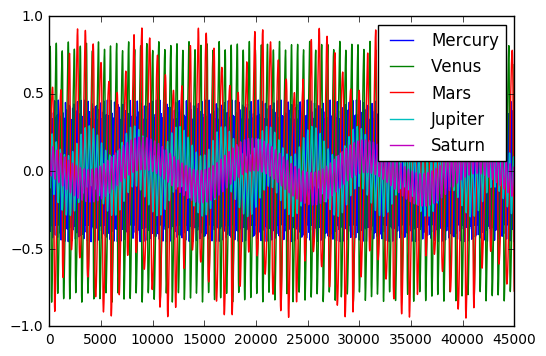

In [16]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np

Mars = ascii.read('c:/users/a/desktop/planet/Mars.txt')
Mercury = ascii.read('c:/users/a/desktop/planet/Mercury.txt')
Venus = ascii.read('c:/users/a/desktop/planet/Venus.txt')
Jupiter = ascii.read('c:/users/a/desktop/planet/Jupiter.txt')             
Saturn = ascii.read('c:/users/a/desktop/planet/Saturn.txt')

Func_Me = np.polyfit(Mercury['col1'],Mercury['col2'],1)
Func_Ve = np.polyfit(Venus['col1'],Venus['col2'],1)
Func_Ma = np.polyfit(Mars['col1'],Mars['col2'],1)
Func_Ju = np.polyfit(Jupiter['col1'],Jupiter['col2'],1)
Func_Sa = np.polyfit(Saturn['col1'],Saturn['col2'],1)
f_Me  = np.poly1d(Func_Me)
f_Ve  = np.poly1d(Func_Ve)
f_Ma  = np.poly1d(Func_Ma)
f_Ju  = np.poly1d(Func_Ju)
f_Sa  = np.poly1d(Func_Sa)

longitudes_Me = f_Me(Mercury['col1'])
longitudes_Ve = f_Ve(Venus['col1'])
longitudes_Ma = f_Ma(Mars['col1'])
longitudes_Ju = f_Ju(Jupiter['col1'])
longitudes_Sa = f_Sa(Saturn['col1'])

plt.plot(Mercury['col1'],Mercury['col2']-longitudes_Me,label='Mercury')
plt.plot(Venus['col1'],Venus['col2']-longitudes_Ve,label='Venus')
plt.plot(Mars['col1'],Mars['col2']-longitudes_Ma,label='Mars')
plt.plot(Jupiter['col1'],Jupiter['col2']-longitudes_Ju,label='Jupiter')
plt.plot(Saturn['col1'],Saturn['col2']-longitudes_Sa,label='Saturn')
plt.legend()

plt.show()

In [11]:
import numpy as np
x=np.array([1,2,3])
y=np.array([2,3,4])
z=np.polyfit(x,y,1)
print(z)

[ 1.  1.]


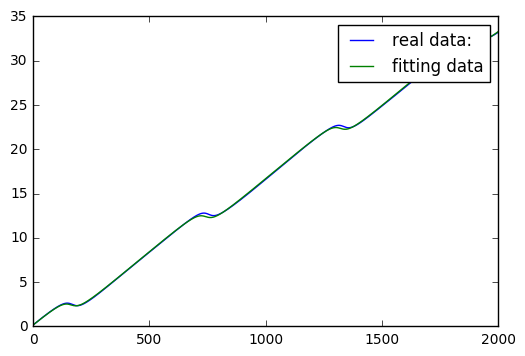

In [81]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt

def normal(angle):
    for i in range(0,len(angle)-1):
        if(angle[i] - angle[i+1] >6):
            angle[i+1:] = angle[i+1:] + 2*np.pi
    return angle

Venus = ascii.read('c:/users/a/desktop/planet/Venus.txt')

Func_Ve = np.polyfit(Venus['col1'],Venus['col2'],1)
f_Ve  = np.poly1d(Func_Ve)
longitudes_Ve = f_Ve(Venus['col1'])

xSun = np.cos(longitudes_Ve[:2000])
ySun = np.sin(longitudes_Ve[:2000])
t = Venus['col1'][:2000]

RP, PerP, w0 = 0.7, 224, 1
#long_fitting = (np.arctan((xSun+RP*np.cos(np.deg2rad(w0+2*np.pi*t/PerP)))/(ySun+RP*np.sin(np.deg2rad(w0+2*np.pi*t/PerP)))))
long_fitting = np.arctan2((ySun+RP*np.sin(w0+2*np.pi*t/PerP)),(xSun+RP*np.cos(w0+2*np.pi*t/PerP)))

plt.clf()
plt.plot(t, Venus['col2'][:2000], label="real data:")
#plt.plot(t, (long_fitting), label="fitting data")
plt.plot(t, normal(long_fitting), label="fitting data")
#print(long_fitting[240:260])
plt.legend()
plt.show()

拟合参数: [   0.72349722  224.763069      0.95607674]


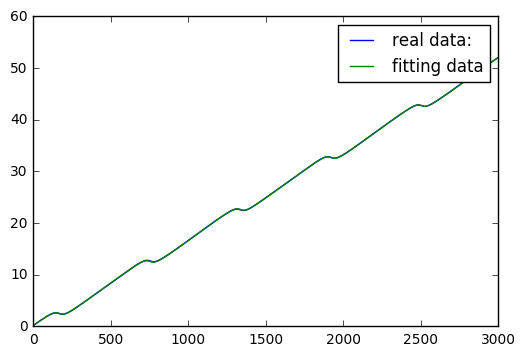

In [80]:
import numpy as np
from astropy.io import ascii
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

def normal(angle):
    for i in range(0,len(angle)-1):
        if(angle[i] - angle[i+1] >6):
            angle[i+1:] = angle[i+1:] + 2*np.pi
    return angle

def func(x,p):
    RP, PerP, w0 = p
    return np.arctan2((ySun+RP*np.sin(w0+2*np.pi*t/PerP)),(xSun+RP*np.cos(w0+2*np.pi*t/PerP)))

def residuals(p, y, x):
    return y-normal(func(x, p))

Venus = ascii.read('c:/users/a/desktop/planet/Venus.txt')

Func_Ve = np.polyfit(Venus['col1'],Venus['col2'],1)
f_Ve  = np.poly1d(Func_Ve)
longitudes_Ve = f_Ve(Venus['col1'])

xSun = np.cos(longitudes_Ve[:3000])
ySun = np.sin(longitudes_Ve[:3000])
t = Venus['col1'][:3000]

p0 = [0.7, 224, 0] #ini para
plsq = leastsq(residuals, p0, args=(Venus['col2'][:3000],t))
print (u"拟合参数:", plsq[0])

plt.clf()
plt.plot(t, Venus['col2'][:3000], label="real data:")
plt.plot(t, normal(func(t, plsq[0])), label="fitting data")
plt.legend()

plt.show()

拟合参数: [ -0.37159212  87.45277669   0.68968823]


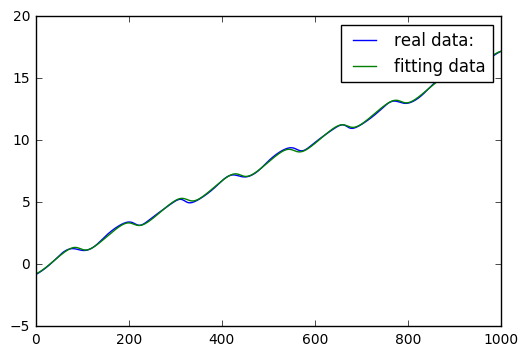

In [84]:
import numpy as np
from astropy.io import ascii
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

def normal(angle):
    for i in range(0,len(angle)-1):
        if(angle[i] - angle[i+1] >6):
            angle[i+1:] = angle[i+1:] + 2*np.pi
    return angle

def func(x,p):
    RP, PerP, w0 = p
    return np.arctan2((ySun+RP*np.sin(w0+2*np.pi*t/PerP)),(xSun+RP*np.cos(w0+2*np.pi*t/PerP)))

def residuals(p, y, x):
    return y-normal(func(x, p))

Mercury = ascii.read('c:/users/a/desktop/planet/Mercury.txt')

Func_Me = np.polyfit(Mercury['col1'],Mercury['col2'],1)
f_Me  = np.poly1d(Func_Me)
longitudes_Me = f_Me(Mercury['col1'])

xSun = np.cos(longitudes_Me[:1000])
ySun = np.sin(longitudes_Me[:1000])
t = Mercury['col1'][:1000]

p0 = [0.4, 88, 0] #ini para
plsq = leastsq(residuals, p0, args=(Mercury['col2'][:1000],t))
print (u"拟合参数:", plsq[0])

plt.clf()
plt.plot(t, Mercury['col2'][:1000], label="real data:")
plt.plot(t, normal(func(t, plsq[0])), label="fitting data")
plt.legend()

plt.show()

拟合参数: [  6.44375669e-01   3.67049890e+02  -2.05073511e-01]


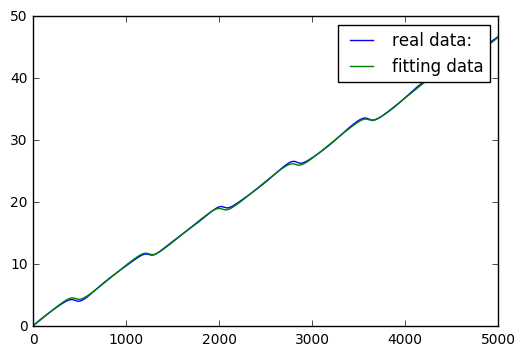

In [95]:
import numpy as np
from astropy.io import ascii
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

def normal(angle):
    for i in range(0,len(angle)-1):
        if(angle[i] - angle[i+1] >6):
            angle[i+1:] = angle[i+1:] + 2*np.pi
    return angle

def func(x,p):
    RP, PerP, w0 = p
    return np.arctan2((ySun+RP*np.sin(w0+2*np.pi*t/PerP)),(xSun+RP*np.cos(w0+2*np.pi*t/PerP)))

def residuals(p, y, x):
    return y-normal(func(x, p))

Mars = ascii.read('c:/users/a/desktop/planet/Mars.txt')

Func_Ma = np.polyfit(Mars['col1'],Mars['col2'],1)
f_Ma  = np.poly1d(Func_Ma)
longitudes_Ma = f_Ma(Mars['col1'])

xSun = np.cos(longitudes_Ma[:5000])
ySun = np.sin(longitudes_Ma[:5000])
t = Mars['col1'][:5000]

p0 = [0.67, 365, 0] #ini para
plsq = leastsq(residuals, p0, args=(Mars['col2'][:5000],t))
print (u"拟合参数:", plsq[0])

plt.clf()
plt.plot(t, Mars['col2'][:5000], label="real data:")
plt.plot(t, normal(func(t, plsq[0])), label="fitting data")
plt.legend()

plt.show()

拟合参数: [  1.88405290e-01   3.65881698e+02  -3.03607983e-01]


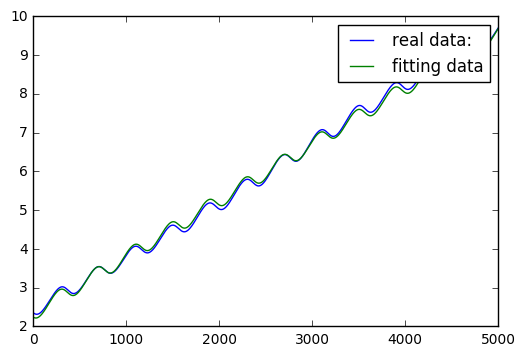

In [98]:
import numpy as np
from astropy.io import ascii
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

def normal(angle):
    for i in range(0,len(angle)-1):
        if(angle[i] - angle[i+1] >6):
            angle[i+1:] = angle[i+1:] + 2*np.pi
    return angle

def func(x,p):
    RP, PerP, w0 = p
    return np.arctan2((ySun+RP*np.sin(w0+2*np.pi*t/PerP)),(xSun+RP*np.cos(w0+2*np.pi*t/PerP)))

def residuals(p, y, x):
    return y-normal(func(x, p))

Jupiter = ascii.read('c:/users/a/desktop/planet/Jupiter.txt')

Func_Ju = np.polyfit(Jupiter['col1'],Jupiter['col2'],1)
f_Ju  = np.poly1d(Func_Ju)
longitudes_Ju = f_Ju(Jupiter['col1'])

xSun = np.cos(longitudes_Ju[:5000])
ySun = np.sin(longitudes_Ju[:5000])
t = Jupiter['col1'][:5000]

p0 = [0.2, 365, 0] #ini para
plsq = leastsq(residuals, p0, args=(Jupiter['col2'][:5000],t))
print (u"拟合参数:", plsq[0])

plt.clf()
plt.plot(t, Jupiter['col2'][:5000], label="real data:")
plt.plot(t, normal(func(t, plsq[0])), label="fitting data")
plt.legend()

plt.show()

拟合参数: [  1.00335049e-01   3.63960441e+02  -5.07795477e-01]


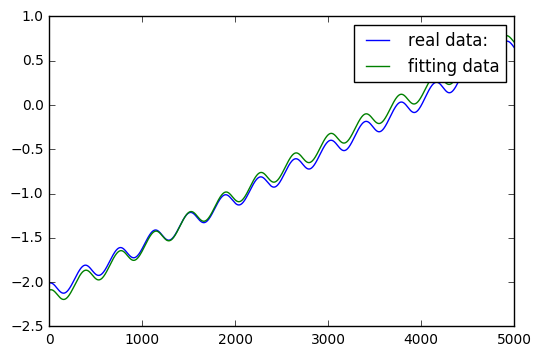

In [100]:
import numpy as np
from astropy.io import ascii
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

def normal(angle):
    for i in range(0,len(angle)-1):
        if(angle[i] - angle[i+1] >6):
            angle[i+1:] = angle[i+1:] + 2*np.pi
    return angle

def func(x,p):
    RP, PerP, w0 = p
    return np.arctan2((ySun+RP*np.sin(w0+2*np.pi*t/PerP)),(xSun+RP*np.cos(w0+2*np.pi*t/PerP)))

def residuals(p, y, x):
    return y-normal(func(x, p))

Saturn = ascii.read('c:/users/a/desktop/planet/Saturn.txt')

Func_Sa = np.polyfit(Saturn['col1'],Saturn['col2'],1)
f_Sa  = np.poly1d(Func_Sa)
longitudes_Sa = f_Sa(Saturn['col1'])

xSun = np.cos(longitudes_Sa[:5000])
ySun = np.sin(longitudes_Sa[:5000])
t = Saturn['col1'][:5000]

p0 = [0.1, 365, 0] #ini para
plsq = leastsq(residuals, p0, args=(Saturn['col2'][:5000],t))
print (u"拟合参数:", plsq[0])

plt.clf()
plt.plot(t, Saturn['col2'][:5000], label="real data:")
plt.plot(t, normal(func(t, plsq[0])), label="fitting data")
plt.legend()

plt.show()

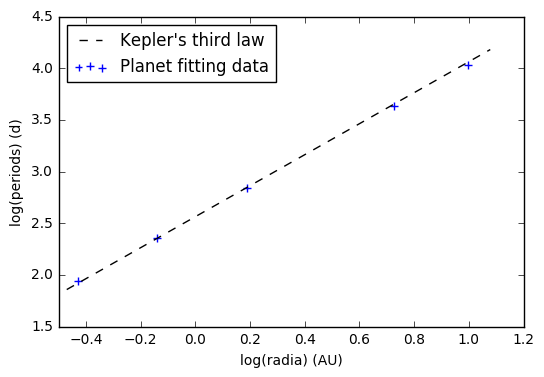

In [141]:
import numpy as np
import matplotlib.pyplot as plt

periods = np.array([87.45277669,224.763069,686.90750392,4330.34197709,10726.12818189])
radia = np.array([0.37159212,0.72349722,1.551889756,5.307706594,9.966606983]) 

r = np.arange(0.3,12,0.02)
p = 365*(r**1.5)

plt.scatter(np.log10(radia),np.log10(periods),marker='+', label='Planet fitting data', color = 'b', edgecolor='none', s=30, alpha=1)
plt.plot(np.log10(r),np.log10(p),'k--',label='Kepler\'s third law')
plt.xlabel('log(radia) (AU)')
plt.ylabel('log(periods) (d)')
plt.xlim(-0.5,1.2)
plt.legend(loc=2)

plt.show()

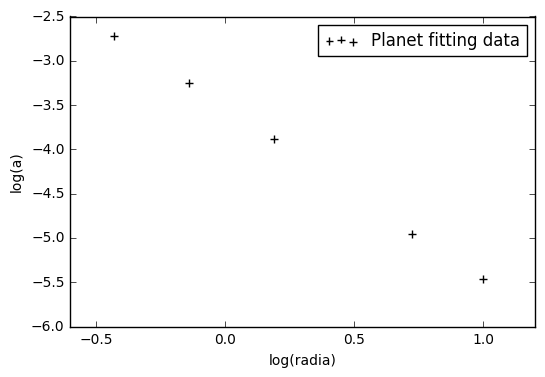

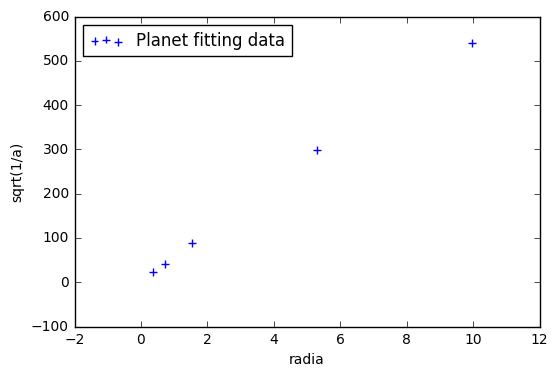

In [175]:
import numpy as np
import matplotlib.pyplot as plt

periods = np.array([87.45277669,224.763069,686.90750392,4330.34197709,10726.12818189])
radia = np.array([0.37159212,0.72349722,1.551889756,5.307706594,9.966606983]) 
omiga = 2*np.pi/periods
vel = omiga*radia
a= (omiga**2)*radia

y = np.sqrt(1/a)

#Func = np.polyfit(radia,y,1)
#f_fitting  = np.poly1d(Func)
#print(f_fitting)
plt.scatter(np.log10(radia),np.log10(a),marker='+', label='Planet fitting data', color = 'k', edgecolor='none', s=30, alpha=1)
plt.xlabel('log(radia)')
plt.ylabel('log(a)')
plt.legend(loc=1)
plt.show()
plt.scatter(radia,y,marker='+', label='Planet fitting data', color = 'b', edgecolor='none', s=30, alpha=1)
plt.xlabel('radia')
plt.ylabel('sqrt(1/a)')
#plt.xlim(-0.5,1.2)
plt.legend(loc=2)

plt.show()

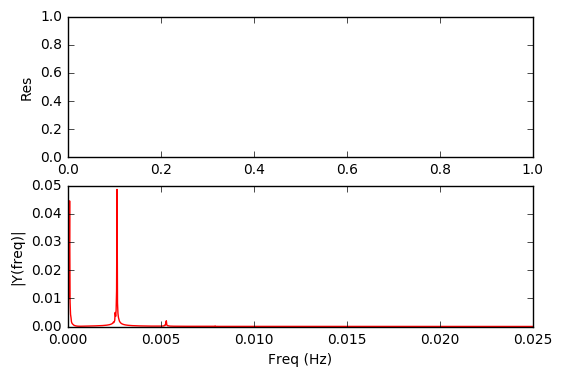

In [129]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api


Saturn = ascii.read('c:/users/a/desktop/planet/Saturn.txt')

Func_Sa = np.polyfit(Saturn['col1'],Saturn['col2'],1)
f_Sa  = np.poly1d(Func_Sa)
longitudes_Sa = f_Sa(Saturn['col1'])
Res = Saturn['col2']-longitudes_Sa

'''
Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,2,Ts) # time vector

ff = 5;   # frequency of the signal
y = 2*np.sin(2*np.pi*ff*t)+np.sin(2*np.pi*10*t)+np.sin(2*np.pi*15*t)
'''
y = Res[:40000]

Fs = 1
n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

fig, ax = plt.subplots(2, 1)
#ax[0].plot(Saturn['col1'][:40000],y)
#ax[0].set_xlabel('Time')
ax[0].set_ylabel('Res')
ax[1].plot(frq[:1000],abs(Y)[:1000],'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plt.show()


In [2]:
import numpy as np

print(np.arange(10))

[0 1 2 3 4 5 6 7 8 9]


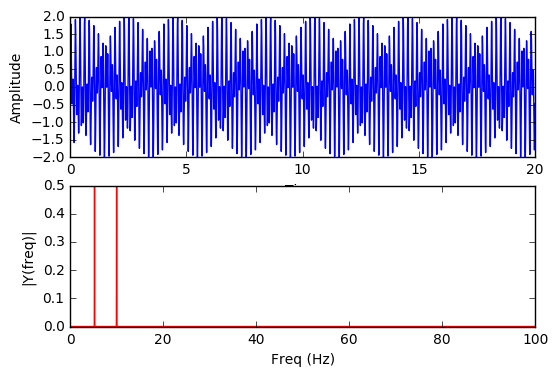

In [103]:
import matplotlib.pyplot as plt
import numpy as np
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

Fs = 200.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,20,Ts) # time vector

ff = 5.25;   # frequency of the signal
y = np.sin(2*np.pi*ff*t)+np.sin(2*np.pi*10*t)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plt.show()

拟合参数: [  9.14786106e-02   3.65436639e+02  -3.59335148e-01]


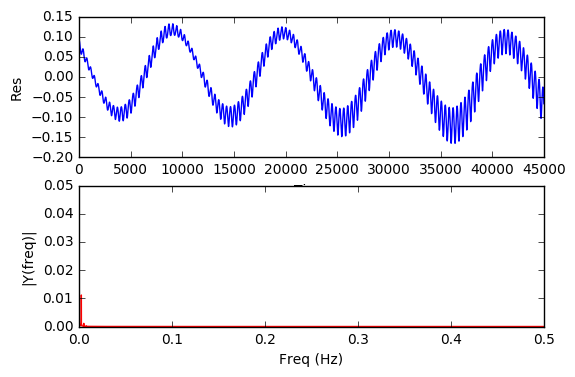

In [155]:
import numpy as np
from astropy.io import ascii
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

def normal(angle):
    for i in range(0,len(angle)-1):
        if(angle[i] - angle[i+1] >6):
            angle[i+1:] = angle[i+1:] + 2*np.pi
    return angle

def func(x,p):
    RP, PerP, w0 = p
    return np.arctan2((ySun+RP*np.sin(w0+2*np.pi*t/PerP)),(xSun+RP*np.cos(w0+2*np.pi*t/PerP)))

def residuals(p, y, x):
    return y-normal(func(x, p))

Saturn = ascii.read('c:/users/a/desktop/planet/Saturn.txt')

Func_Sa = np.polyfit(Saturn['col1'],Saturn['col2'],1)
f_Sa  = np.poly1d(Func_Sa)
longitudes_Sa = f_Sa(Saturn['col1'])

xSun = np.cos(longitudes_Sa)
ySun = np.sin(longitudes_Sa)
t = Saturn['col1']

p0 = [0.1, 365, 0] #ini para
plsq = leastsq(residuals, p0, args=(Saturn['col2'],t))
print (u"拟合参数:", plsq[0])


y = normal(Saturn['col2']-normal(func(t, plsq[0])))


Fs = 1
n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(Saturn['col1'],y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Res')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plt.show()

拟合参数: [  9.14786106e-02   3.65436639e+02  -3.59335148e-01]


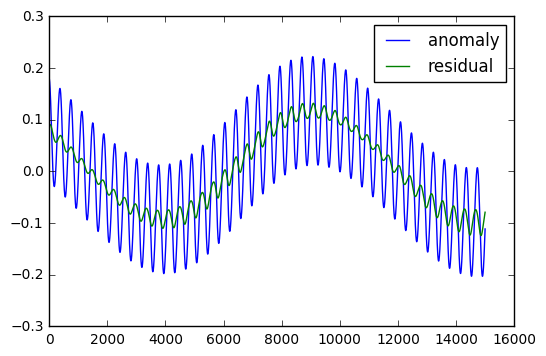

In [164]:
import numpy as np
from astropy.io import ascii
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

def normal(angle):
    for i in range(0,len(angle)-1):
        if(angle[i] - angle[i+1] >6):
            angle[i+1:] = angle[i+1:] + 2*np.pi
    return angle

def func(x,p):
    RP, PerP, w0 = p
    return np.arctan2((ySun+RP*np.sin(w0+2*np.pi*t/PerP)),(xSun+RP*np.cos(w0+2*np.pi*t/PerP)))

def residuals(p, y, x):
    return y-normal(func(x, p))

Saturn = ascii.read('c:/users/a/desktop/planet/Saturn.txt')

Func_Sa = np.polyfit(Saturn['col1'],Saturn['col2'],1)
f_Sa  = np.poly1d(Func_Sa)
longitudes_Sa = f_Sa(Saturn['col1'])

xSun = np.cos(longitudes_Sa)
ySun = np.sin(longitudes_Sa)
t = Saturn['col1']

p0 = [0.1, 365, 0] #ini para
plsq = leastsq(residuals, p0, args=(Saturn['col2'],t))
print (u"拟合参数:", plsq[0])

plt.clf()
plt.plot(t[:15000], (Saturn['col2']-longitudes_Sa)[:15000], label="anomaly")
#plt.legend()
#plt.show()
plt.plot(t[:15000], normal(Saturn['col2']-normal(func(t, plsq[0])))[:15000], label="residual")
plt.legend()

plt.show()

拟合参数: [  1.21359972e-01   3.65187893e+02  -2.39230326e-01]


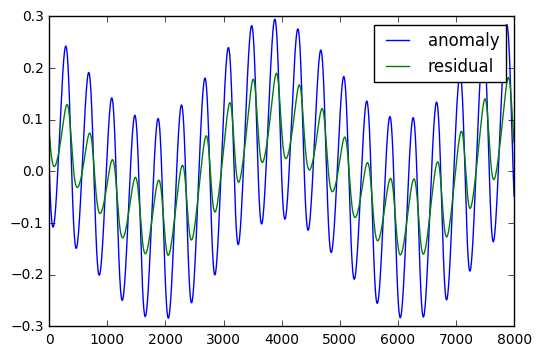

In [166]:
import numpy as np
from astropy.io import ascii
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

def normal(angle):
    for i in range(0,len(angle)-1):
        if(angle[i] - angle[i+1] >6):
            angle[i+1:] = angle[i+1:] + 2*np.pi
    return angle

def func(x,p):
    RP, PerP, w0 = p
    return np.arctan2((ySun+RP*np.sin(w0+2*np.pi*t/PerP)),(xSun+RP*np.cos(w0+2*np.pi*t/PerP)))

def residuals(p, y, x):
    return y-normal(func(x, p))

Jupiter = ascii.read('c:/users/a/desktop/planet/Jupiter.txt')

Func_Sa = np.polyfit(Jupiter['col1'],Jupiter['col2'],1)
f_Sa  = np.poly1d(Func_Sa)
longitudes_Sa = f_Sa(Jupiter['col1'])

xSun = np.cos(longitudes_Sa)
ySun = np.sin(longitudes_Sa)
t = Jupiter['col1']

p0 = [0.1, 365, 0] #ini para
plsq = leastsq(residuals, p0, args=(Jupiter['col2'],t))
print (u"拟合参数:", plsq[0])

plt.clf()
plt.plot(t[:8000], (Jupiter['col2']-longitudes_Sa)[:8000], label="anomaly")
#plt.legend()
#plt.show()
plt.plot(t[:8000], normal(Jupiter['col2']-normal(func(t, plsq[0])))[:8000], label="residual")
plt.legend()

plt.show()